In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

from astropy import cosmology

In [2]:
grid = al.Grid.uniform(shape_2d=(80, 80), pixel_scales=0.1, sub_size=1)
psf = al.Kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)

In [3]:
Exponential_profile = al.mp.SphericalExponential(centre=(0.0, 0.0),
                                             mass_to_light_ratio= 1,
                                             effective_radius= 3.2,
                                             intensity= 0.1
                                             )
lens_galaxy = al.Galaxy(
    redshift=0.035,
    mass=Exponential_profile,
)



In [4]:
source_galaxy = al.Galaxy(
    redshift=2.1,
    light=al.lp.EllipticalSersic(
        centre=(0.2, -0.1),
        elliptical_comps=(0.3, 0.111111),
        intensity=3,
        effective_radius=0.5,
        sersic_index=1,
    ),
)

In [5]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])
aplt.Tracer.image(tracer=tracer, grid=grid)

tracer.einstein_radius_in_units()

NoSectionError: No section: 'Could not find section colormaps in config at path /home/carlos/autolens_workspace/howtolens/MGE/../../config/visualize/general.ini'

In [21]:
mask = al.Mask.unmasked(
    shape_2d=grid.shape_2d, pixel_scales=grid.pixel_scales, sub_size=1,
)

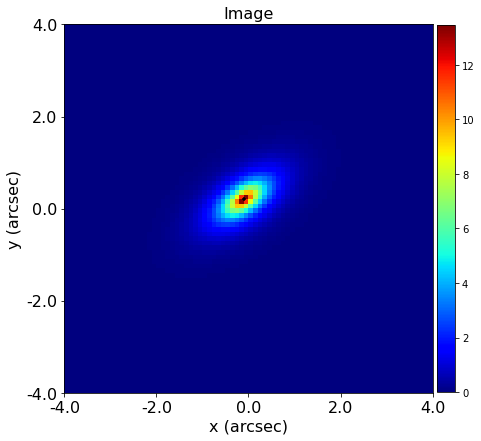

In [22]:
aplt.Galaxy.image(galaxy=source_galaxy, grid=grid)

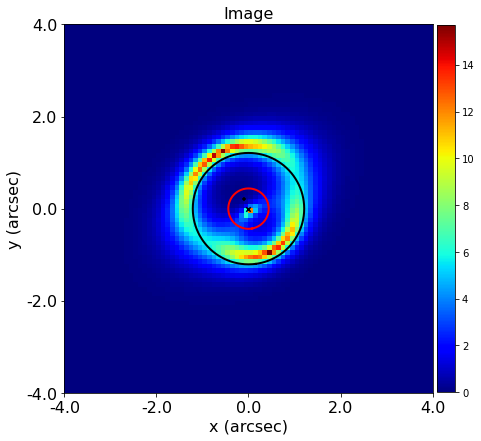

In [23]:
aplt.Tracer.image(tracer=tracer, grid=grid)

In [9]:
normal_image = tracer.image_from_grid(grid=grid)
padded_image = tracer.padded_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_2d
)
print(normal_image.shape)
print(padded_image.shape)

(6400,)
(8100,)


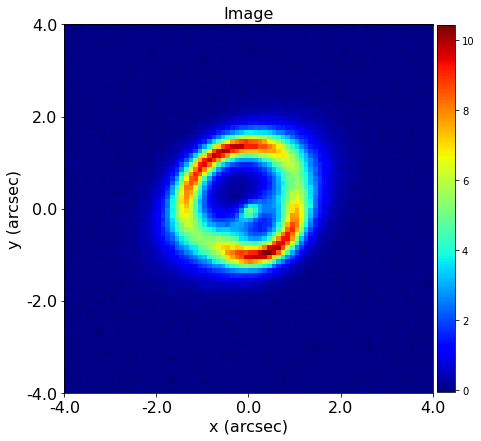

In [10]:
simulator = al.SimulatorImaging(
    exposure_time_map=al.Array.full(fill_value=300.0, shape_2d=grid.shape_2d),
    psf=psf,
    background_sky_map=al.Array.full(fill_value=0.1, shape_2d=grid.shape_2d),
    add_noise=True,
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)
aplt.Imaging.image(imaging=imaging)

In [11]:
from pyprojroot import here

workspace_path = str(here())
dataset_path = f"{workspace_path}/howtolens/MGE/Data"
print("Dataset Path: ", dataset_path)

Dataset Path:  /home/carlos/autolens_workspace/howtolens/MGE/Data


In [13]:
imaging.output_to_fits(
    image_path=f"{dataset_path}/ImageExp.fits",
    noise_map_path=f"{dataset_path}/NoiseExp.fits",
    psf_path=f"{dataset_path}/PSFExp.fits",
    overwrite=True,
)